# Crosstabulation and Normalizing

In [4]:
import glob
import re

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Debug the code
There are 5 bugs in the following fragment:

In [32]:
def extract_year(filename: str) -> str:
    """Returns the digits from a filename"""
    hits = re.findall(r"(\d+).txt", filename)
    if hits:
        return int(hits[0])
    else:
        raise ValueError(r"no digits in filename {filename}")

In [34]:
def read_baby_file(filename: str) -> pd.DataFrame:
    """Returns a df for a single baby name file"""
    return pd.read_csv(
        filename,
        names=['name', 'gender', 'amount']
    ).assign(
        year=extract_year(filename)
    )

In [35]:
df = pd.concat([
    read_baby_file(fn)
    for fn in glob.glob("../names/yob*.txt")
])
df.shape

(2052781, 4)

In [36]:
df.head(3)

,name,gender,amount,year
0,Mary,F,63175,1955
1,Deborah,F,52320,1955
2,Linda,F,51302,1955


## Long and Wide format

"*I would personally like to focus more on data selection and wrangling based on certain conditions and understanding the unique properties of the index column."*

In [37]:
long = df.groupby(['name', 'gender', 'year']).sum()
long.head()

amount
name  gender year        
Aaban M      2007       5
             2009       6
             2010       9
             2011      11
             2012      11

In [41]:
# long format helps to look up stuff
long.loc[("Leia", "F", 2000)]

amount    123
Name: (Leia, F, 2000), dtype: int64

In [38]:
# long format: 1 column with a MultiIndex and many rows
long.shape

(2052781, 1)

In [45]:
# wide format: more columns and fewer rows
long.unstack(0).head()  # unstacks the first level of the index

amount                                                       \
name         Aaban Aabha Aabid Aabidah Aabir Aabriella Aada Aadam Aadan   
gender year                                                               
F      1880    NaN   NaN   NaN     NaN   NaN       NaN  NaN   NaN   NaN   
       1881    NaN   NaN   NaN     NaN   NaN       NaN  NaN   NaN   NaN   
       1882    NaN   NaN   NaN     NaN   NaN       NaN  NaN   NaN   NaN   
       1883    NaN   NaN   NaN     NaN   NaN       NaN  NaN   NaN   NaN   
       1884    NaN   NaN   NaN     NaN   NaN       NaN  NaN   NaN   NaN   

                     ...                                                     \
name        Aadarsh  ... Zytaveon Zytavion Zytavious Zyus Zyva Zyvion Zyvon   
gender year          ...                                                      
F      1880     NaN  ...      NaN      NaN       NaN  NaN  NaN    NaN   NaN   
       1881     NaN  ...      NaN      NaN       NaN  NaN  NaN    NaN   NaN   
       1882     NaN  ...      NaN      NaN       NaN  NaN  NaN    NaN   NaN   
       1883     NaN  ...      NaN      NaN       NaN  NaN  NaN    NaN   NaN   
       1884     NaN  ...      NaN      NaN       NaN  NaN  NaN    NaN   NaN   

                                 
name        Zyyanna Zyyon Zzyzx  
gender year                      
F      1880     NaN   NaN   NaN  
       1881     NaN   NaN   NaN  
       1882     NaN   NaN   NaN  
       1883     NaN   NaN   NaN  
       1884     NaN   NaN   NaN  

[5 rows x 101338 columns]

### More specific aggregations

*When selecting certain rows from a dataframe using .loc , how can we populate the rows that weren't selected with a default value like zero/NaN?*

In [62]:
starwars = ["Luke", "Leia", "Darth", "Ben", "Rey", "Amidala", "Emperor"]

In [63]:
# single column with a MultiIndex as a pd.Series
byyear = df.groupby(["year", "name"])["amount"].sum()
df2 = byyear.unstack(0)
df2 = df2.loc[starwars].fillna(0)
df2 = df2.transpose()
df2.head(3)

name,Luke,Leia,Darth,Ben,Rey,Amidala,Emperor
year,,,,,,,
1880,43.0,0.0,0.0,305.0,0.0,0.0,0.0
1881,42.0,0.0,0.0,289.0,0.0,0.0,0.0
1882,44.0,0.0,0.0,334.0,0.0,0.0,0.0


In [86]:
import random

In [88]:
episodes = [1977, 1980, 1983, 1999, 2002, 2005, 2015, 2017, 2019]
epcolors = [random.choice(["blue", "green", "orange", "peachpuff", "firebrick"])
            for _ in range(len(episodes))]

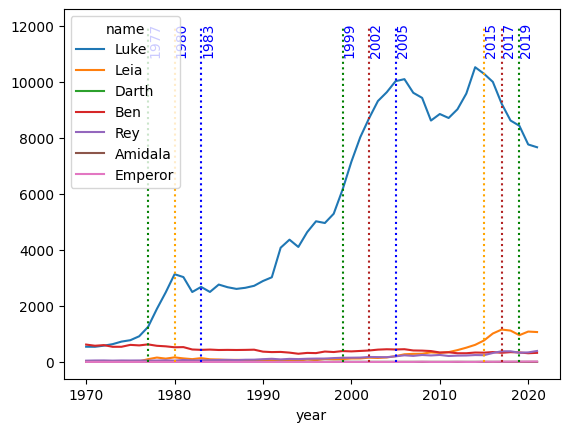

In [89]:
df2.loc[1970:].plot()
plt.vlines(episodes, 
           ymin=0,
           ymax=12000,
           color=epcolors,
           linestyles="dotted"
          )
[plt.text(e, 11000, e, rotation=90, color="blue") for e in episodes]
None

*"How can we plot multiple dataframes in a single graph and label them accordingly? Project 2, Task 5"*

In [ ]:
# transform vs agg vs apply

### Normalizing

In [92]:
starwars = ["Luke", "Leia", "Darth", "Ben", "Rey", "Amidala", "Emperor"]

In [98]:
# single column with a MultiIndex as a pd.Series
byyear = df.groupby(["year", "name"])["amount"].sum()
df2 = byyear.unstack(0)
df2 = df2.loc[starwars].fillna(0)
df2 = df2.transpose()
df2.head(3)

name,Luke,Leia,Darth,Ben,Rey,Amidala,Emperor
year,,,,,,,
1880,43.0,0.0,0.0,305.0,0.0,0.0,0.0
1881,42.0,0.0,0.0,289.0,0.0,0.0,0.0
1882,44.0,0.0,0.0,334.0,0.0,0.0,0.0


<AxesSubplot: xlabel='year'>

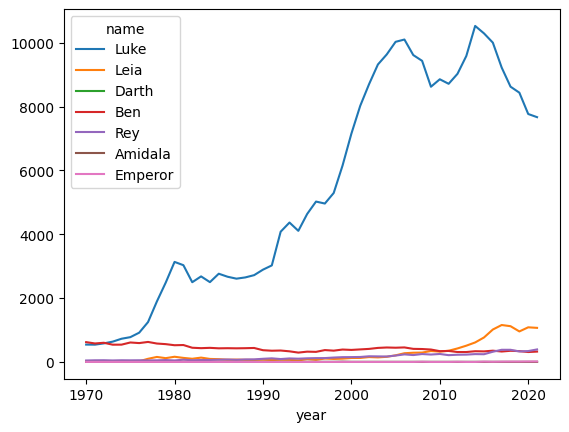

In [99]:
df2.loc[1970:].plot()

<AxesSubplot: xlabel='year'>

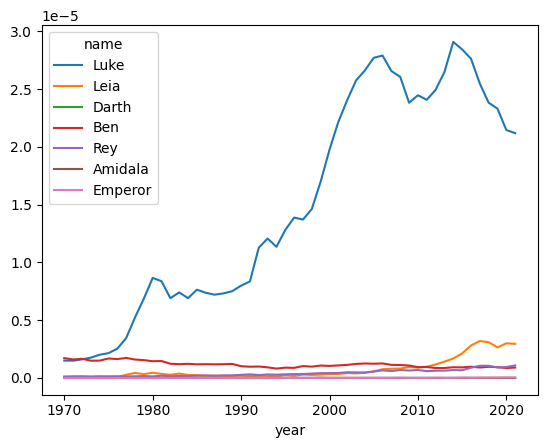

In [100]:
# divided by total pop -> useless
df3 = df2 / df['amount'].sum()
df3.loc[1970:].plot()

/home/kristian/miniconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<AxesSubplot: xlabel='year'>

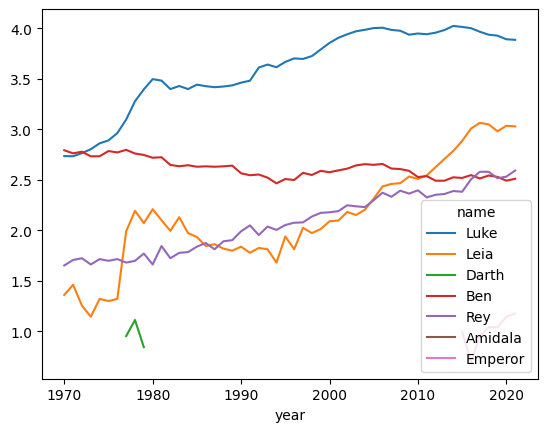

In [105]:
# log
df3 = np.log10(df2)
df3.loc[1970:].plot()

<AxesSubplot: xlabel='year'>

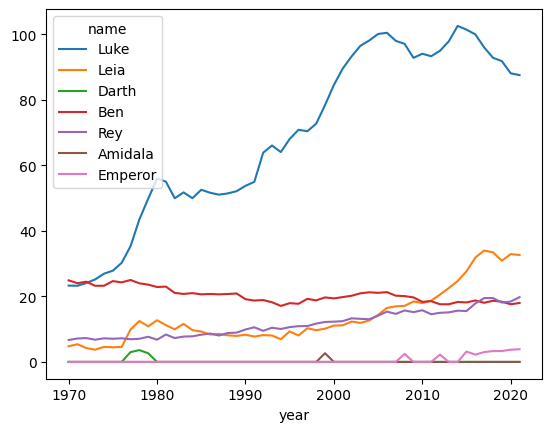

In [106]:
df3 = np.sqrt(df2)
df3.loc[1970:].plot()

In [116]:
starwars = ["Luke", "Donald", "Mary", "Sarah", "George", "John", "Isabella"]
byyear = df.groupby(["year", "name"])["amount"].sum()
df2 = byyear.unstack(0)
df2 = df2.loc[starwars].fillna(0)
df2 = df2.transpose()
df2.head(3)

name,Luke,Donald,Mary,Sarah,George,John,Isabella
year,,,,,,,
1880,43.0,46.0,7092.0,1288.0,5152.0,9701.0,50.0
1881,42.0,27.0,6948.0,1226.0,4694.0,8795.0,50.0
1882,44.0,48.0,8178.0,1410.0,5225.0,9597.0,44.0


<AxesSubplot: xlabel='year'>

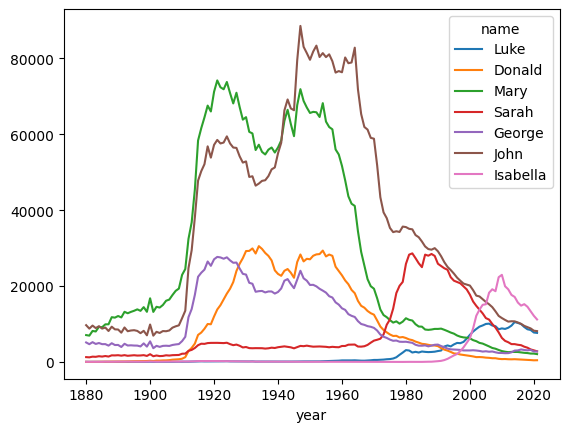

In [117]:
df2.plot()

### Normalize by total number of births

In [120]:
# by an aggregate
by_year = df.groupby("year")["amount"].sum()
by_year.head(3)

year
1880    201484
1881    192690
1882    221533
Name: amount, dtype: int64

In [133]:
starwars = ["John", "Paul", "George", "Ringo", "Donald", "Mary", "Madonna", "Sarah",  "Isabella"]
byyear = df.groupby(["year", "name"])["amount"].sum()
df2 = byyear.unstack(0)
df2 = df2.loc[starwars].fillna(0)
df2 = 100 * df2 / by_year  # now we get % of births for that year
df2 = df2.transpose()
df2.head(3)

name,John,Paul,George,Ringo,Donald,Mary,Madonna,Sarah,Isabella
year,,,,,,,,,
1880,4.814774,0.149392,2.557027,0.0,0.022831,3.519882,0.0,0.639257,0.024816
1881,4.564326,0.151020,2.436037,0.0,0.014012,3.605792,0.0,0.636255,0.025948
1882,4.332086,0.179206,2.358565,0.0,0.021667,3.691549,0.0,0.636474,0.019862


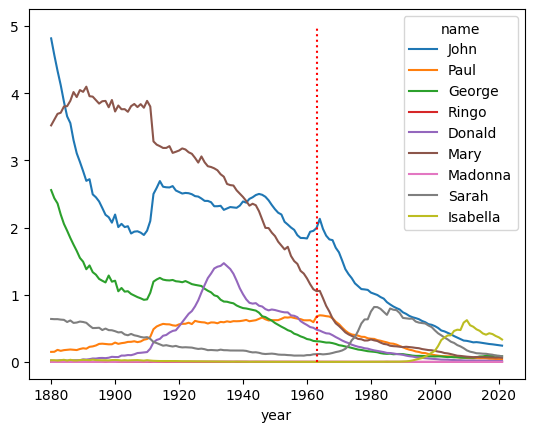

In [134]:
df2.plot()
plt.vlines(1963, 
           ymin=0,
           ymax=5,
           color="red",
           linestyles="dotted"
          )

# The Rise of Individuality - it exists!

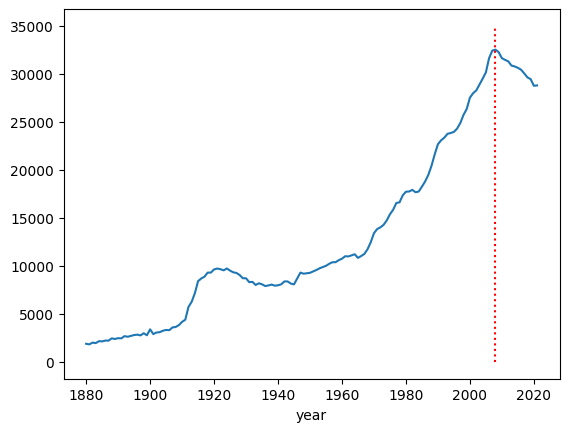

In [147]:
df.groupby("year")["name"].nunique().plot()

plt.vlines(2008, 
           ymin=0,
           ymax=35000,
           color="red",
           linestyles="dotted"
          )

<AxesSubplot: xlabel='year'>

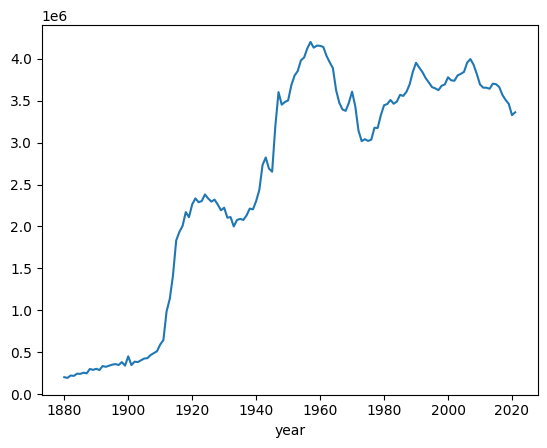

In [148]:
df.groupby("year")["amount"].sum().plot()


In [ ]:
# ideas for further study
# - examine decrease in percentage
# - scatterplot of names over time
# - normalize number of names vs births
# - simulate?